In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy.linalg as la

# Q1

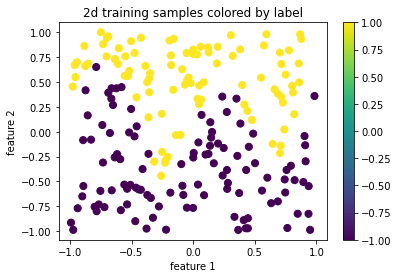

In [2]:
n = 200;
p = 2;
X = 2*(np.random.rand(n,p)-.5)
y = np.sign(X[:,1]-(X[:,0]**2/2+np.sin(X[:,0]*7)/2))

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], 50, c=y)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d training samples colored by label')
plt.show()

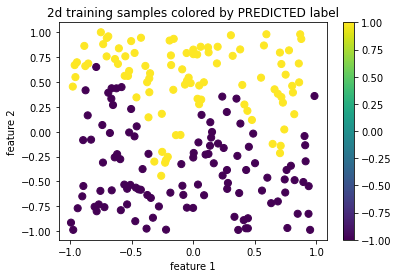

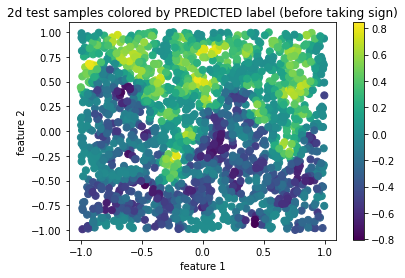

In [13]:
sigma = .05
lam = 1

### YOUR CODE STARTS HERE ###

def get_gauss(xi, xj, sig):
    exponent = -1*(np.dot((xi-xj), (xi-xj)) / (2*sig*sig))
    return np.exp(exponent)


K = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        K[i, j] = get_gauss(X[i], X[j], sigma)

alpha = la.inv(K + lam*np.identity(n))@y
yhat = np.dot(K, alpha)
### YOUR CODE ENDS HERE ### 

y2 = np.array(np.sign(yhat))
plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], 50, c=y2)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d training samples colored by PREDICTED label')
plt.show()

ntest = 2000;
Xtest = 2*(np.random.rand(ntest,p)-.5)

### YOUR CODE STARTS HERE ###
K_test = np.zeros((ntest, n))
for i in range(ntest):
    for j in range(n):
        K_test[i, j] = get_gauss(Xtest[i], X[j], sigma)

ytest = np.dot(K_test, alpha)
### YOUR CODE ENDS HERE ###


plt.figure(3)
plt.scatter(Xtest[:,0], Xtest[:,1], 50, c=np.array(ytest))
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d test samples colored by PREDICTED label (before taking sign)')
plt.show()

